## Monopoly Power and Endogenous Product Variety: Distortions and Remedies : production of welfare graphs.

_This notebook solves various models for different parameter values and plots the associated welfare gains comparing competetitive equilibrium and planner equilibrium solutions._

### Computation steps

Press `ctrl+enter`to run each code block one after the other.
The small Python 3 icon  (round shape under Logout button at the top right) will turn blalck when the code is running. Once the running is done, it will turn back to white. You can continue with the next step

---
__Step 1: Define various scenarios__

_Required inputs:_
- `modfile`: name of the model file. See _`model_files`_ folders. Each file includes the model equations, parameters, calibrations, exogenous process. 

- `freeparam`: name of the free parameter 

- `range`: range of this parameter (starting value, end value, number of grid points)

_Optional inputs:_

- `fixedparam`: name of the parameter (which will be different than the baseline calibration) that you want to change and plot. 

This can be useful when you want to keeo the baseline calibration in the yaml file but solve the model for a spesific parameter value, as we do for the last model with translog preferences where in first case $\varphi = 0.25$ and $\varphi = 5$ in the second)

---

__Step 2: Compute welfares__ calling the `"BGM_solver"` module. Solve the model for each scenario 

`BGM_solver.py` is the python code to 

- import each model file
- set information specified above
- solve the model for each parameter value
- return results (welfare planner eq., welfare competitive eq., welfare gains for each parameter value)

More information in this file. All the steps are commented.


---
__Step 3: Export results__ in a table (also export to excel)

Number of rows are equal to N which is the number of different values of the free paramater. So each line will give us the results for one specific parameter value. For each scenario, there are 4 results to be exported so there will be 4 x 'number of scenarios' columns in the output table. For example if we solve the general model (endogenous investment and elastic labor with traslog) with free parameter sigma and `varphi = 0.25`, the model file `translog_ELEI.yaml` will be called and output variables will be named after `translog_ELEI_sigma_varphi025` *** 

- `translog_ELEI_varphi025_sigma` --> values of sigma	
- `translog_ELEI_varphi025_sigma_po` --> planner optimum (consumption equivalent) of welfare for each sigme	
- `translog_ELEI_varphi025_sigma_ce`--> competitive eq. (consumption equivalent) of welfare for each sigma)
- `translog_ELEI_varphi025_sigma_gain` --> welfare gains

---
__Step 4: Plots__

Calling the column names defined above, plot welfare gains for each scenario as a function of the free parameter

---

__Note__

**For each scenario, output variables are named after specified information. If there is a fixed parameter argument, this will be included in the name.For example

- for the scenario where we solve the `ces` model file with free parameter `xi` the model file `ces.yaml` will be called and the output variables after solving the model for each $\xi$ value will be named after `ces_xi`.  

- if we solve the general model (endogenous investment and elastic labor with traslog) with free parameter sigma and `varphi = 0.25`, the model file `translog_ELEI.yaml` will be called , output variables after solving the model for each $\sigma$ value where $\varphi = 0.25 $ will be named after `translog_ELEI_sigma_varphi025`
```



## Define scenarios

In [49]:
# Define the various scenarios/cases 
N = 100 #Number of grid points for the free parameter range

experiments = [
    ### Baseline model
    dict(modfile='ces', freeparam='xi', range=(0.01,1.0,N)),
    dict(modfile='exponential', freeparam='alpha', range=(0.1,10,N)),
    dict(modfile='translog',  freeparam='sigma', range=(0.1,10,N)),
    
    ### Elastic labor
    dict(modfile ='cesds_EL', freeparam='varphi', range=(0.2,10,N)),
    dict(modfile ='cesds_EL', freeparam='mu', range=(1.1,2,N)),    
    
    ### Endogenous investment (inelastic labour)
    dict(modfile ='cesds_EI', freeparam='zeta', range=(0.3,0.9,N)),
    dict(modfile ='cesds_EI', freeparam='mu', range=(1.1,2,N)),
    
    ### Elastic labor and endogenous investment 
    dict(modfile ='translog_ELEI', freeparam='sigma', range=(0.23040863317764562,10,N), fixedparam = 'varphi', value=0.25),
    dict(modfile ='translog_ELEI', freeparam='sigma', range=(0.23040863317764562,10,N), fixedparam = 'varphi', value=5) ,
    
]

_Note: For the general model with translog preferences, `'0.23040863317764562'` is the smallest exact value for $\varphi$ = 0.25  at which welfare for competitive equilibrium is larger than 0. So we choose this inital value for the graphs, at points below that, welfare gains are infinite so we can't plot them_

## Compute Welfares

In [50]:
# Serial evaluation -> for each case compute ce,po and welfare gains
from BGM_solver import compute_case
all_welfares = [compute_case(exp) for exp in experiments];

It is normal that you see the warning `symbol po has no calibrated value` $po=0$ for competetitive equilibrium and $po = 1$ social planner optimum. This is commented out in model files as we set it at each step in the solver

## Export results

In [57]:
# Import the necesarry python libraries for plots
from matplotlib import pyplot as plt 
import numpy as np
import matplotlib.ticker as ticker

#Import the python library for tables
import pandas

# Create the table for all paramter values, ce and po welfare, gains and export to excel
df = pandas.concat(all_welfares, axis=1)
df.to_excel('output/welfare_gains.xls')

# Print results
df

,ces_xi,ces_xi_po,ces_xi_ce,ces_xi_gain,exponential_alpha,exponential_alpha_po,exponential_alpha_ce,exponential_alpha_gain,translog_sigma,translog_sigma_po,...,cesds_EI_mu_ce,cesds_EI_mu_gain,translog_ELEI_varphi025_sigma,translog_ELEI_varphi025_sigma_po,translog_ELEI_varphi025_sigma_ce,translog_ELEI_varphi025_sigma_gain,translog_ELEI_varphi5_sigma,translog_ELEI_varphi5_sigma_po,translog_ELEI_varphi5_sigma_ce,translog_ELEI_varphi5_sigma_gain
0,0.01,0.978782,0.766951,27.619875,0.1,0.274497,0.274382,0.041982,0.1,0.415957,...,2.638500,0.239319,0.230409,0.455683,0.331413,37.497053,0.230409,0.994237,0.905994,9.739854
1,0.02,0.971274,0.782567,24.113920,0.2,0.415957,0.415865,0.022142,0.2,0.547579,...,2.692477,0.281927,0.329091,0.505602,0.399795,26.465364,0.329091,1.117228,1.038335,7.598007
2,0.03,0.968779,0.798539,21.318855,0.3,0.495031,0.494957,0.014860,0.3,0.615511,...,2.750215,0.327555,0.427774,0.539797,0.444622,21.405668,0.427774,1.201111,1.129283,6.360532
3,0.04,0.969482,0.814877,18.972792,0.4,0.547579,0.547518,0.011096,0.4,0.659036,...,2.811665,0.376113,0.526457,0.565231,0.477607,18.346597,0.526457,1.263251,1.196931,5.540842
4,0.05,0.972545,0.831587,16.950487,0.5,0.585898,0.585846,0.008807,0.5,0.690086,...,2.876810,0.427517,0.625140,0.585164,0.503377,16.247753,0.625140,1.311780,1.249892,4.951516
5,0.06,0.977492,0.848678,15.178154,0.6,0.615511,0.615466,0.007272,0.6,0.713722,...,2.945654,0.481685,0.723822,0.601363,0.524305,14.697154,0.723822,1.351098,1.292868,4.503950
6,0.07,0.984018,0.866158,13.607227,0.7,0.639324,0.639284,0.006174,0.7,0.732520,...,3.018225,0.538540,0.822505,0.614884,0.541777,13.494003,0.822505,1.383830,1.328684,4.150437
7,0.08,0.991918,0.884035,12.203422,0.8,0.659036,0.659001,0.005352,0.8,0.747947,...,3.094566,0.598007,0.921188,0.626403,0.556668,12.527103,0.921188,1.411652,1.359150,3.862847
8,0.09,1.001044,0.902319,10.941337,0.9,0.675719,0.675687,0.004714,0.9,0.760913,...,3.174735,0.660016,1.019871,0.636377,0.569571,11.729245,1.019871,1.435696,1.385494,3.623442
9,0.10,1.011290,0.921017,9.801462,1.0,0.690086,0.690057,0.004205,1.0,0.772016,...,3.258804,0.724498,1.118553,0.645130,0.580899,11.057122,1.118553,1.456756,1.408577,3.420442


## Make plots

### General C.E.S.

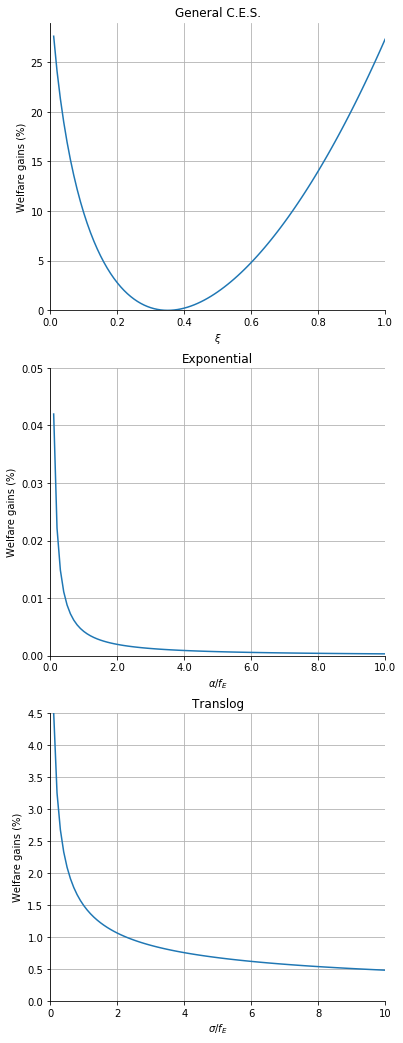

In [97]:
fig = plt.figure(figsize=(6,18))

ax = plt.subplot(311)
plt.plot(df['ces_xi'],df['ces_xi_gain'])
plt.ylabel('Welfare gains (%)')
plt.xlabel("$\\xi$")
yl = plt.ylim()
plt.ylim(0,yl[1])
plt.title("General C.E.S.")
plt.grid()
# xlim(4,8)
# ylim(0,0.2)
#remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlim(0,1)

ax = plt.subplot(312)
plt.plot(df['exponential_alpha'],df['exponential_alpha_gain'])
plt.grid()
yl = plt.ylim()
plt.ylim(0,yl[1])
plt.title("Exponential")
plt.xlabel("$\\alpha/ f_{E}$")
plt.ylabel('Welfare gains (%)')
#remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Set axis decimals (too long by default)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
# set axis ticks
plt.xlim(0,10)
plt.ylim(0,0.05)


ax = plt.subplot(313)
plt.plot(df['translog_sigma'],df['translog_sigma_gain'])
plt.grid()
yl = plt.ylim()
plt.ylim(0,yl[1])
plt.title("Translog")
plt.xlabel("$\\sigma/ f_{E}$")
plt.ylabel('Welfare gains (%)')
#remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# set axis ticks
ax.yaxis.set_ticks(np.arange(0, 5, 0.5))
plt.xlim(0,10)
plt.ylim(0,4.5)


plt.savefig('output/BGM_welfare_gains.png')
plt.savefig('output/BGM_welfare_gains.pdf')
plt.savefig('output/BGM_welfare_gains.svg')


### C.E.S.-D.S. with elastic labor

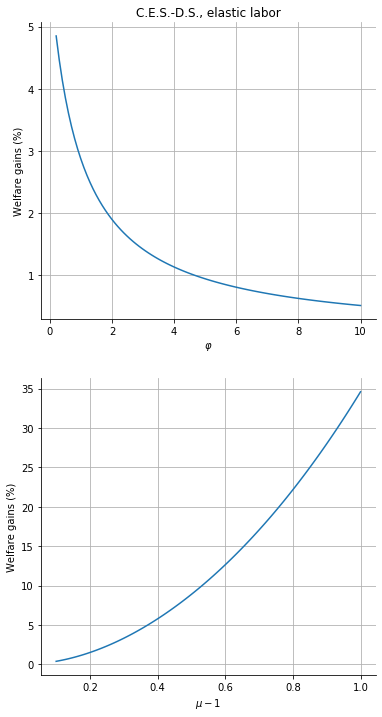

In [98]:
fig = plt.figure(figsize=(6,12))

ax = plt.subplot(211)
plt.plot(df['cesds_EL_varphi'],df['cesds_EL_varphi_gain'])
plt.ylabel('Welfare gains (%)')
plt.xlabel("$\\varphi$")
#yl = plt.ylim()
#plt.ylim(0,yl[1])
plt.title('C.E.S.-D.S., elastic labor')
plt.grid()
# xlim(4,8)
# ylim(0,0.2)
#remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax = plt.subplot(212)
plt.plot(df['cesds_EL_mu']-1,df['cesds_EL_mu_gain'])
plt.ylabel('Welfare gains (%)')
plt.xlabel("$\\mu-1$")
#yl = plt.ylim()
#plt.ylim(0,yl[1])
#plt.title("C.E.S.-DS, Elastic Labor")
plt.grid()
# xlim(4,8)
# ylim(0,0.2)

#remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.savefig('output/BGM_welfare_gains_EL.png')
plt.savefig('output/BGM_welfare_gains_EL.pdf')
plt.savefig('output/BGM_welfare_gains_EL.svg')

### C.E.S.-D.S. with endogenous Investment (inelastic Labor)

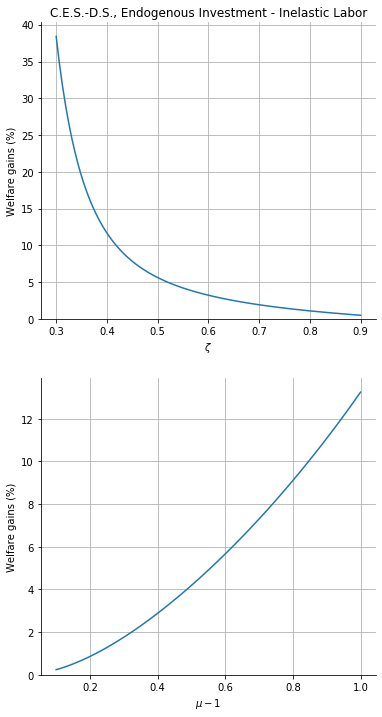

In [99]:
fig = plt.figure(figsize=(6,12))


ax = plt.subplot(211)
plt.plot(df['cesds_EI_zeta'],df['cesds_EI_zeta_gain'])
plt.ylabel('Welfare gains (%)')
plt.xlabel("$\\zeta$")
yl = plt.ylim()
plt.ylim(0,yl[1])
plt.title("C.E.S.-D.S., Endogenous Investment - Inelastic Labor")
plt.grid()
# xlim(4,8)
# ylim(0,0.2)
#remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax = plt.subplot(212)
plt.plot(df['cesds_EI_mu']-1,df['cesds_EI_mu_gain'])
plt.ylabel('Welfare gains (%)')

plt.xlabel("$\\mu-1$")
yl = plt.ylim()
plt.ylim(0,yl[1])
#plt.title("C.E.S.-DS, Endogenous Investment - Inelastic Labor")
plt.grid()
# xlim(4,8)
# ylim(0,0.2)

#remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.savefig('output/BGM_welfare_gains_EI.png')
plt.savefig('output/BGM_welfare_gains_EI.pdf')
plt.savefig('output/BGM_welfare_gains_EI.svg')

### General model with endogenous Investment ans elastic labor (translog preferences)

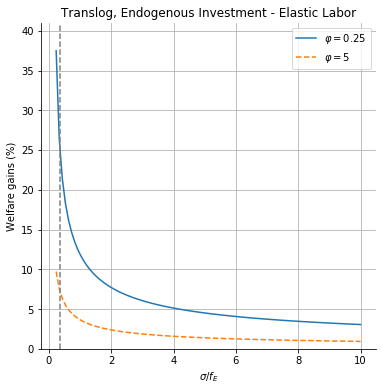

In [104]:
fig,ax = plt.subplots(figsize=(6,6))
plt.plot(df['translog_ELEI_varphi025_sigma'],df['translog_ELEI_varphi025_sigma_gain'], label="$\\varphi = 0.25$")
plt.plot(df['translog_ELEI_varphi5_sigma'],df['translog_ELEI_varphi5_sigma_gain'], label="$\\varphi = 5$", linestyle='--', )
plt.ylabel('Welfare gains (%)')
plt.xlabel("$\\sigma/ f_{E}$")
#yl = plt.ylim()
#plt.ylim(0,yl[1])
plt.title("Translog, Endogenous Investment - Elastic Labor")
plt.grid()
plt.legend(loc='best')

#plt.xlim(0,10)
plt.ylim(0,41)

# Exact point where sigma = 0.35 to show
# sigma = 0.35, phi=0.25 --> welfare gains(%) 25.121546	
# sigma = 0.35, phi=5 --> welfare gains(%) 7.28467
plt.axvline(x=0.35, linestyle='--', color='gray')

#remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('output/BGM_welfare_gains_general_model.png')
plt.savefig('output/BGM_welfare_gains_general_model.pdf')
plt.savefig('output/BGM_welfare_gains_general_model.svg')